Aim
=========================================


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


Dataset characteristics
=========================================
The dataset has the following fields:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

=========================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Reading and Understanding the Data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
# Read the data from csv file

df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/bike_sharing.csv")

In [ ]:
# Check the head of the dataset
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [ ]:
# checking the shape of dataframe
df.shape

(730, 16)

In [ ]:
# statistics for the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# checking for the null values in column data
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# renaming few columns for better readibility: 'yr':'year','mnth':'month','hum':'humidity'
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [ ]:
# dropping the unwanted columns: 'instant','dteday','casual','registered' from df
df1 = df.drop(['instant','dteday','casual','registered'],axis=1)

In [ ]:
# Encoding/mapping the season column: 1:'spring', 2:'summer', 3:'fall', 4:'winter'

df1.season = df1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})



In [ ]:
# Encoding/mapping the month column {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df1.month = df1.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [ ]:
# Encoding/mapping the weekday column {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
df1.weekday = df1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [ ]:
# Encoding/mapping the weathersit column {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}
df1.weathersit = df1.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [ ]:
# check the head of the dataset
df1.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,0,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,mon,1,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


## Step 2: Visualising the Data

In [ ]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands/behaves against the target variable
print(df.columns[df.dtypes == "O"])

Index(['dteday'], dtype='object')


In [ ]:
# create a function to produce barplots related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column,y = 'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x = column, y = 'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

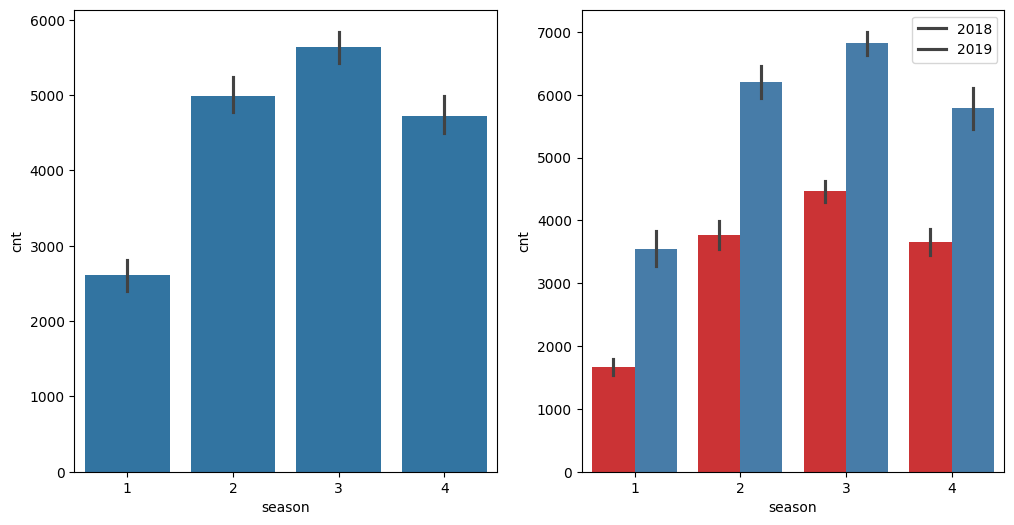

In [ ]:
# plotting visualization for season column
plot_cat_columns('season')



Inference:

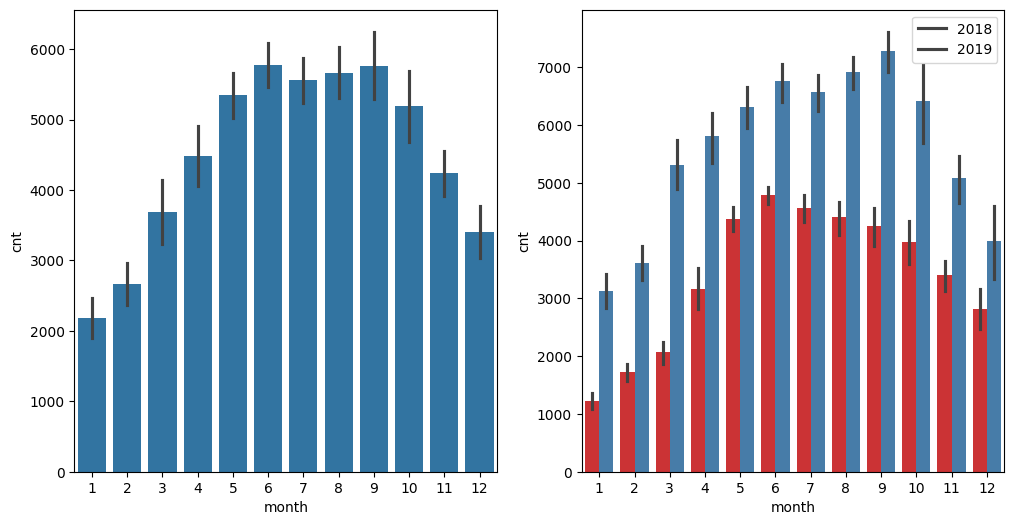

In [ ]:
# plotting visualization for month column
plot_cat_columns('month')


Inference:

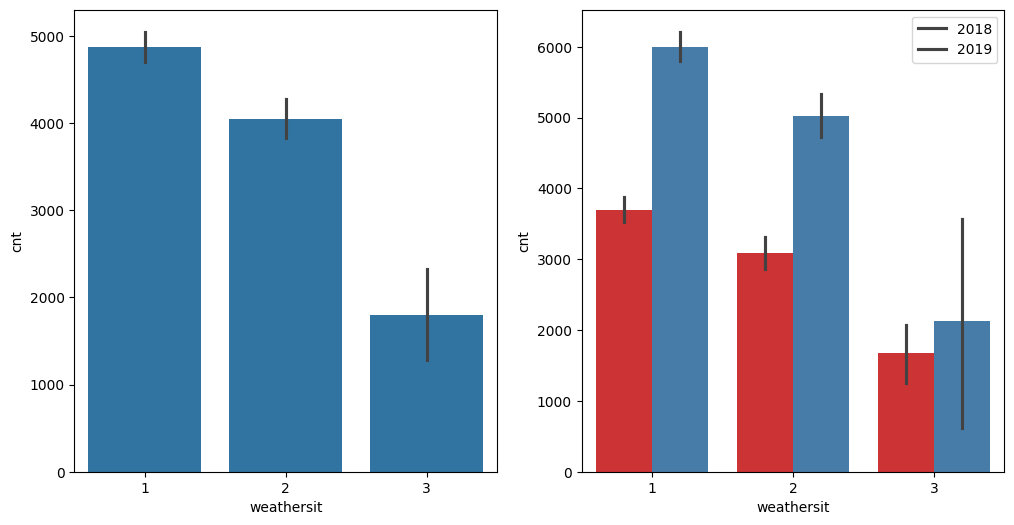

In [ ]:
# plotting visualization for weathersit column
plot_cat_columns('weathersit')


Inference

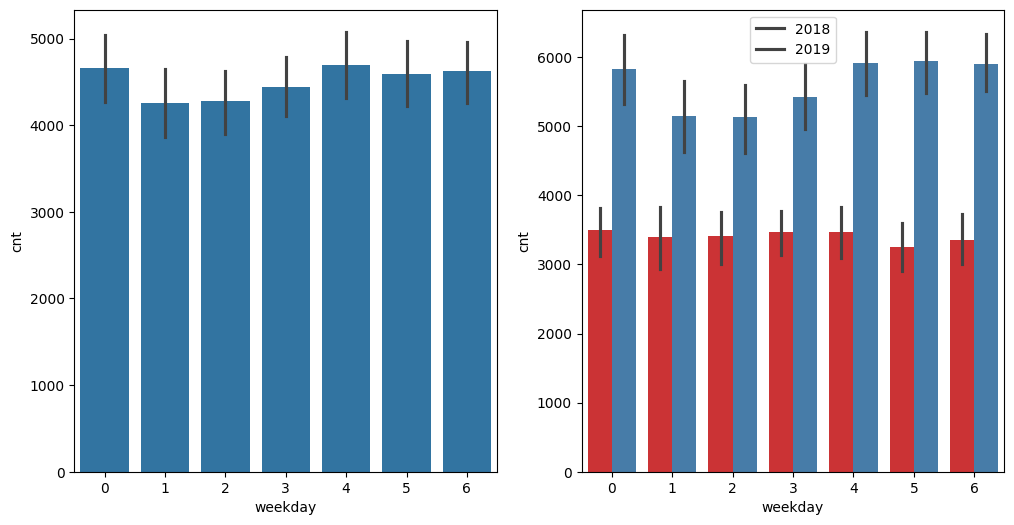

In [ ]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Inference

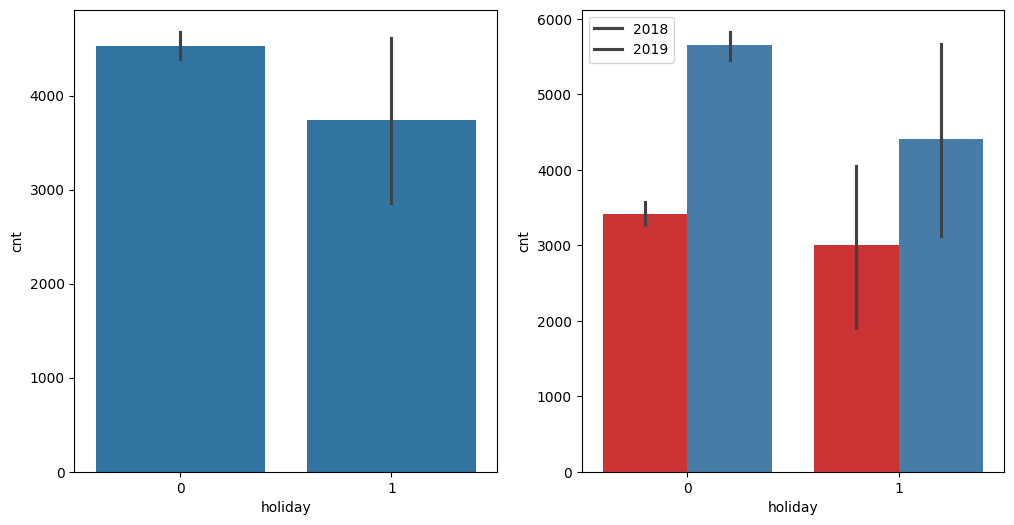

In [ ]:
# plotting visualization for holiday column
plot_cat_columns('holiday')


Inference:

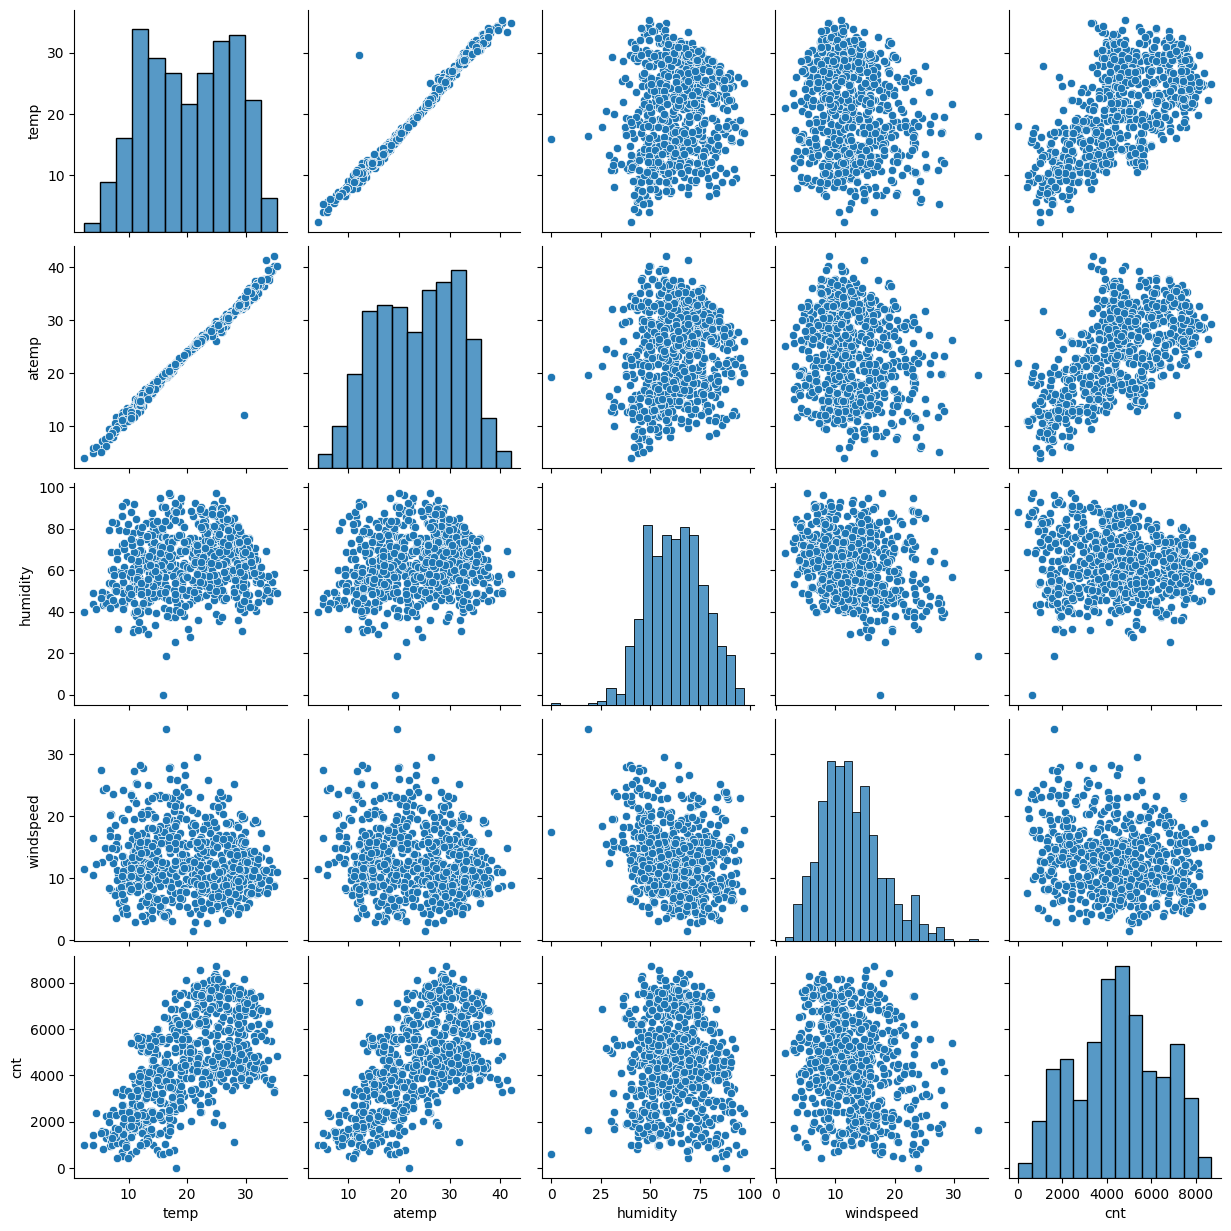

In [ ]:
# Analysing/visualizing the numerical columns: 'temp','atemp','humidity','windspeed','cnt' (hint: pairplot)
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Create a pairplot for numerical columns

sns.pairplot(df1[numeric_cols])
plt.show()


<Axes: >

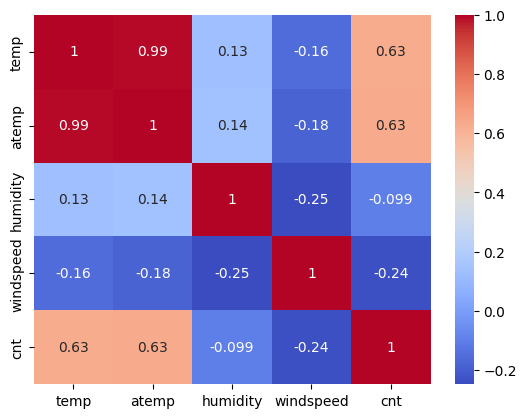

In [ ]:
# Checking the correlation between the numerical variables
import seaborn as sns
sns.heatmap(df1[numeric_cols].corr(), annot=True, cmap='coolwarm')

Inference:

## Step 3: Data Preparation

In [ ]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df = pd.get_dummies(df1.month,drop_first=True)
weekdays_df = pd.get_dummies(df1.weekday, drop_first=True)
weathersit_df = pd.get_dummies(df1.weathersit, drop_first=True)
seasons_df = pd.get_dummies(df1.season, drop_first=True)

In [ ]:
# Merging  the dataframe (df) with the dummy variable datasets (months_df,weekdays_df,weathersit_df,seasons_df).

df_new = pd.concat([df1, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [ ]:
# dropping unnecessary columns as we have already created dummy variable out of it ('season','month','weekday','weathersit')
df_new = df_new.drop(['season','month','weekday','weathersit'], axis=1)

In [ ]:
# check the head of new dataframe
df_new.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,False,True,True,False,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,True,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,False,False,...,True,False,False,False,False,False,False,True,False,False
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,False,False,...,False,True,False,False,False,False,True,True,False,False
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,False,False,...,False,False,False,False,False,False,True,True,False,False
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,False,False,...,False,False,False,True,False,False,False,True,False,False
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,False,False,...,False,False,False,False,True,False,False,True,False,False


In [ ]:
# check the shape of new dataframe
df_new.shape

(730, 34)

In [ ]:
df_new1 = df_new.copy()
df_new2 = df_new.copy()
df_new3 = df_new.copy()
df_new4 = df_new.copy()

In [ ]:
df_new1.head(10)

,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,...,2,3,4,5,6,2,3,2,3,4
0,1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,False,False,False,False,False,True,False,False,False,False
1,2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,True,False,False,False,False,True,False,False,False,False
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,False,True,False,False,False,False,False,False,False,False
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,False,False,True,False,False,False,False,False,False,False
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,False,False,False,True,False,False,False,False,False,False
5,6,06-01-2018,0,0,0,8.378268,11.66045,51.8261,6.000868,88,...,False,False,False,False,True,False,False,False,False,False
6,7,07-01-2018,0,0,0,8.057402,10.44195,49.8696,11.304642,148,...,False,False,False,False,False,True,False,False,False,False
7,8,08-01-2018,0,0,1,6.765000,8.11270,53.5833,17.875868,68,...,False,False,False,False,False,True,False,False,False,False
8,9,09-01-2018,0,0,1,5.671653,5.80875,43.4167,24.250650,54,...,True,False,False,False,False,False,False,False,False,False
9,10,10-01-2018,0,0,1,6.184153,7.54440,48.2917,14.958889,41,...,False,True,False,False,False,False,False,False,False,False


## Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100) # you can change random state or train_size

In [ ]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train2, df_test2 = train_test_split(df_new2, train_size = 0.7, random_state = 90) # you can change random state or train_size

In [ ]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train3, df_test3 = train_test_split(df_new3, train_size = 0.7, random_state = 80) # you can change random state or train_size

In [ ]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train4, df_test4 = train_test_split(df_new4, train_size = 0.7, random_state = 30) # you can change random state or train_size

In [ ]:
# check the shape of training datatset
df_train.shape

(510, 34)

In [ ]:
df_train.describe()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,837.633333,3647.703922,4485.337255
std,209.596164,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,675.936359,1578.410906,1950.666077
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,2.000000,20.000000,22.000000
25%,187.250000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,311.000000,2468.250000,3120.000000
50%,373.000000,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,700.000000,3657.000000,4530.000000
75%,552.750000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,1076.250000,4841.000000,5973.500000
max,729.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,3283.000000,6946.000000,8714.000000


In [ ]:
df_train2.shape

(510, 34)

In [ ]:
df_train2.describe()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,365.145098,0.498039,0.027451,0.690196,20.306819,23.764076,63.509963,12.543441,841.986275,3663.249020,4505.235294
std,211.132819,0.500487,0.163554,0.462867,7.462334,8.071641,14.187320,4.999905,689.992490,1559.552967,1947.896115
min,3.000000,0.000000,0.000000,0.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,180.250000,0.000000,0.000000,0.000000,13.863125,16.942587,52.427100,8.885607,316.250000,2506.250000,3230.750000
50%,364.500000,0.000000,0.000000,1.000000,20.622549,24.636975,63.437500,11.979734,696.500000,3651.500000,4508.000000
75%,550.750000,1.000000,0.000000,1.000000,26.812299,30.398100,73.614575,15.368259,1077.000000,4758.750000,5914.750000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df_train3.shape

(510, 34)

In [ ]:
df_train4.shape

(510, 34)

In [ ]:
df_train4.describe()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,360.778431,0.496078,0.037255,0.682353,20.167091,23.613010,62.937530,12.731523,858.841176,3588.427451,4447.268627
std,212.816753,0.500476,0.189572,0.466018,7.544199,8.174624,14.186626,5.127352,698.642529,1543.383557,1936.160541
min,2.000000,0.000000,0.000000,0.000000,3.993043,5.896500,0.000000,1.500244,2.000000,20.000000,22.000000
25%,173.250000,0.000000,0.000000,0.000000,13.632500,16.523988,51.989600,9.041985,307.500000,2456.500000,3100.000000
50%,363.500000,0.000000,0.000000,1.000000,19.611674,23.578975,62.791700,11.958227,703.500000,3689.500000,4558.000000
75%,541.500000,1.000000,0.000000,1.000000,26.761028,30.398050,73.406275,15.656795,1121.000000,4665.000000,5864.250000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# check the shape of testing datatset
df_test.shape

(220, 34)

In [ ]:
df_test2.shape

(220, 34)

In [ ]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables ('temp','atemp','humidity','windspeed','cnt')
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

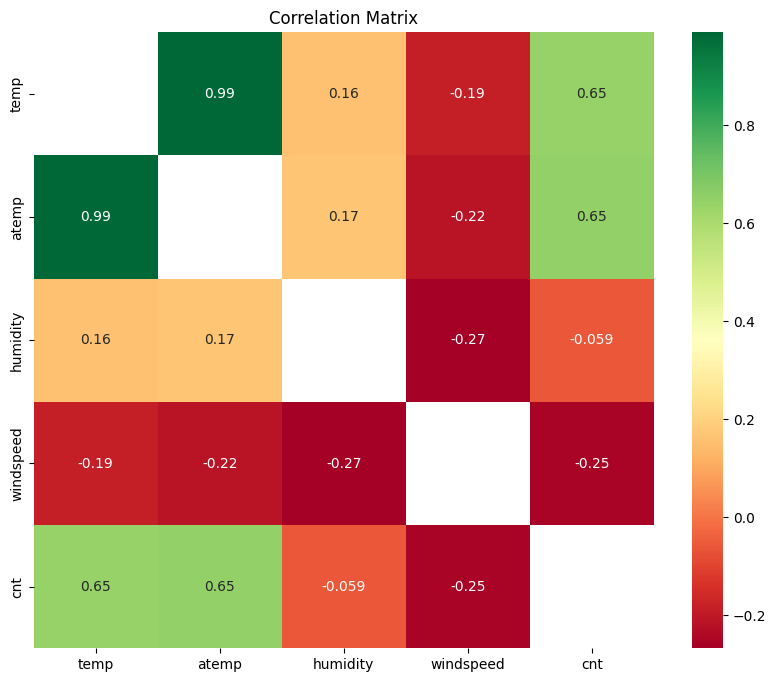

In [ ]:
# check the correlation coefficients to see which variables are highly correlated (a        )
corr_matrix = df_train[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", mask= corr_matrix.values == 1)
plt.title('Correlation Matrix')
plt.show()

#### Inference:

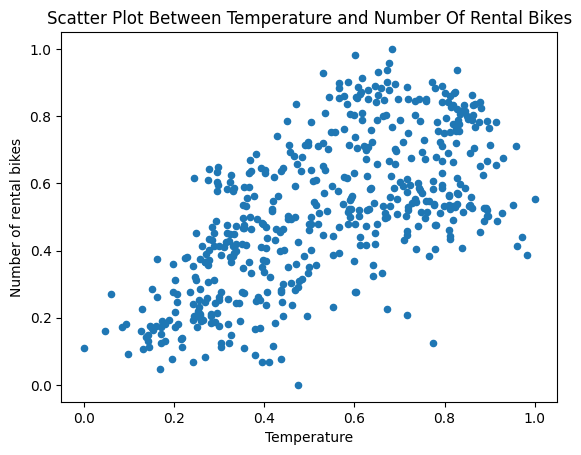

In [ ]:
# Visualizing one of the correlation to see the trends via Scatter plot.
df_train.plot.scatter(x = 'temp', y = 'cnt')
plt.xlabel('Temperature')
plt.ylabel('Number of rental bikes')
plt.title('Scatter Plot Between Temperature and Number Of Rental Bikes')

plt.show()

Inference:

In [ ]:
# Building the Linear Model (y_train: target, X_train: features)
y_train = df_train['cnt']
X_train = df_train.drop(columns='cnt')

In [ ]:
df_train.dtypes

year                int64
holiday             int64
workingday          int64
temp              float64
atemp             float64
humidity          float64
windspeed         float64
cnt               float64
aug                  bool
dec                  bool
feb                  bool
jan                  bool
july                 bool
june                 bool
mar                  bool
may                  bool
nov                  bool
oct                  bool
sep                  bool
mon                  bool
sat                  bool
sun                  bool
thu                  bool
tue                  bool
wed                  bool
Light_snowrain       bool
Misty                bool
spring               bool
summer               bool
winter               bool
dtype: object

In [ ]:
X_train.columns = X_train.columns.astype(str)

In [ ]:
X_train.dtypes

instant         int64
year            int64
holiday         int64
workingday      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
cnt           float64
2                bool
3                bool
4                bool
5                bool
6                bool
7                bool
8                bool
9                bool
10               bool
11               bool
12               bool
1                bool
2                bool
3                bool
4                bool
5                bool
6                bool
2                bool
3                bool
2                bool
3                bool
4                bool
dtype: object

In [ ]:
df_train['dteday'] = pd.to_datetime(df_train['dteday'])

In [ ]:
X_train = df_train.drop(['dteday'], axis=1)

RECURSIVE FEATURE ELIMINATION

In [ ]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [ ]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [ ]:
# checking which columns have been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [ ]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

## Step 5: Building a linear model

In [ ]:
y_train = y_train.astype(float)
X_train_rfe = X_train_rfe.astype(float)

In [ ]:
# Building 1st OLS model using  X_train_rfe and y_train
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          8.15e-189
Time:                        21:14:33   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

 **DROP FEATURES WITH HIGH P_VALUE.**

In [ ]:
# Get p-values of each features
p_values = lr_1.pvalues

# Set a threshold for p-values (e.g., 0.05)
threshold = 0.01

# Identify features with high p-values
high_p_value_features = p_values[p_values > threshold].index

# Drop features with high p-values from X_train_rfe
X_train_rfe_dropped = X_train_rfe.drop(columns=high_p_value_features)

In [ ]:
high_p_value_features

Index(['dec', 'jan', 'nov'], dtype='object')

#### Build the 2nd linear regression model. Any improvements?

In [ ]:
X_train_lm_2 = sm.add_constant(X_train_rfe_dropped)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          2.95e-190
Time:                        21:24:30   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2848      0.034      8.

In [ ]:
# Checking the parameters and their coefficient values (hint: 'your model name'.params)
lr_2.params

const             0.284754
year              0.229357
holiday          -0.096878
temp              0.529863
humidity         -0.172595
windspeed        -0.182190
july             -0.057247
sep               0.083251
Light_snowrain   -0.236920
Misty            -0.052653
spring           -0.056371
summer            0.053078
winter            0.097610
dtype: float64

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [ ]:
# Applying scaling on the test dataset

df_test[numeric_cols] = scaler.fit_transform(df_test[numeric_cols])

In [ ]:
# Separate y_test and X_test
y_test = df_test['cnt']
X_test = df_test.drop(columns= 'cnt')

In [ ]:
# Find the column names of the model with higher performance
col1 = X_train_rfe_dropped.columns
print(col1)
# Create X_test with the previous columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_with_const = sm.add_constant(X_test)


Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'july', 'sep',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [ ]:
# Predict y
y_pred = lr_2.predict(X_test_with_const)

In [ ]:
# Find r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8130974087548142


## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [ ]:
y_pred = pd.to_numeric(y_pred, errors='coerce')

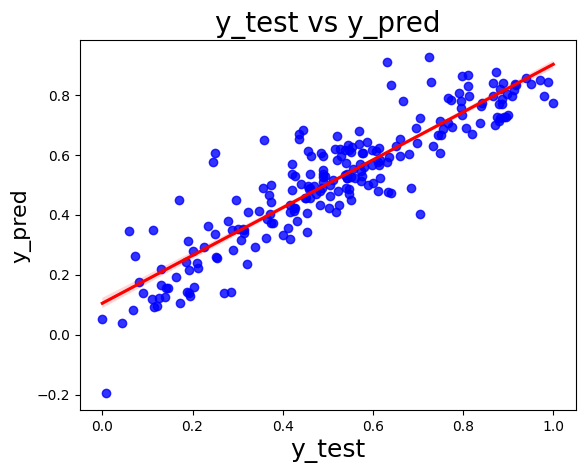

In [ ]:
# Plotting y_test and y_pred to understand the spread
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
# Find the params for the best model
lr_2.params

const             0.284754
year              0.229357
holiday          -0.096878
temp              0.529863
humidity         -0.172595
windspeed        -0.182190
july             -0.057247
sep               0.083251
Light_snowrain   -0.236920
Misty            -0.052653
spring           -0.056371
summer            0.053078
winter            0.097610
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt =  0.284754 + 0.229357*year -0.096878*holiday + 0.529863*temp -0.172595*humidity -0.182190*windspeed -0.057247*july + 0.083251*sep -0.236920*Light_snowrain -0.052653*Misty -0.056371*spring + 0.053078*summer + 0.097610*winter     $

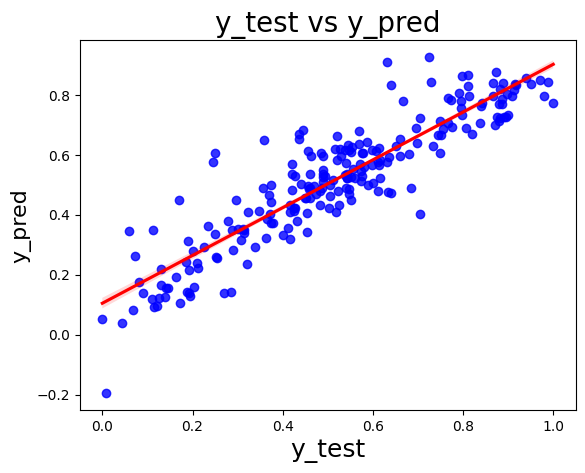

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Take-aways:

